## About Dataset
 

This dataset includes 5 years worth of H1-B visa petitions in the U.S. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

This file contains H1-B data from the LCA Program data files (H1-B, H-1B1, E-3). These datasets can be found on the U.S. Department of Labor Site. Although this dataset is not complete but it is enough for data analyis and to find interesting pattern.



In [1]:
# imports

library(tidyverse)
library(ggplot2)
library(dplyr)
library(usmap)
library(scales)
library(ggrepel)
#supress warnings
knitr::opts_chunk$set(warning = FALSE)
# Ed's favorite options
knitr::opts_chunk$set(echo=TRUE, cache=TRUE, fig.asp=0.65, fig.width=6.5, comment="")
# scipen makes scientific notation less likely
# pillar.sigfig controls number of significant digits in tibble output
options(tibble.print_max=6, tibble.print_min=6, scipen=9, pillar.sigfig=4)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




[1] "h1b-visa-petitions-20152019"

In [2]:
# Load the dataset
data <- read.csv("../input/h1b-visa-petitions-20152019/h1b_disclosure_data_2015_2019.csv")

# View the structure of the dataset
str(data)

'data.frame':	857216 obs. of  13 variables:
 $ CASE_NUMBER        : chr  "I-200-09285-514415" "I-200-09341-564186" "I-200-09342-274341" "I-200-09364-425868" ...
 $ CASE_STATUS        : chr  "CERTIFIED" "CERTIFIED-WITHDRAWN" "CERTIFIED" "CERTIFIED" ...
 $ EMPLOYER_NAME      : chr  "IT CATS LLC" "XPERT TECHNOLOGIES, INC." "ISR INFO WAY, INC." "MAGIC CIRCLE FILMS INTERNATIONAL LLC" ...
 $ SOC_NAME           : chr  "COMPUTER SYSTEMS ANALYSTS" "COMPUTER OCCUPATIONS, ALL OTHER*" "SOFTWARE DEVELOPERS, APPLICATIONS" "FILM AND VIDEO EDITORS" ...
 $ SOC_CODE           : chr  "15-1121" "15-1799" "15-1132" "27-4032" ...
 $ JOB_TITLE          : chr  "SENIOR BUSINESS ANALYST" "QUALITY ASSURANCE ANALYST" "SR. SOFTWARE DEVELOPER" "VIDEO EDITOR" ...
 $ FULL_TIME_POSITION : chr  "Y" "Y" "Y" "Y" ...
 $ PREVAILING_WAGE    : num  109117 58282 84906 39333 68638 ...
 $ WORKSITE_CITY      : chr  "NORTH WALES," "CAMP HILL" "CHICAGO" "AUBURN" ...
 $ WORKSITE_STATE_ABB : chr  "PA" "PA" "IL" "NY" ...
 $ YEAR     

Check for missing values and clean the dataset as necessary:


In [3]:
# Check for missing values
colSums(is.na(data))

# Remove or fill missing values as appropriate
clean_data <- na.omit(data)

CASE_NUMBER         CASE_STATUS       EMPLOYER_NAME            SOC_NAME 
                  0                   0                   0                   0 
           SOC_CODE           JOB_TITLE  FULL_TIME_POSITION     PREVAILING_WAGE 
                  0                   2                   0                   4 
      WORKSITE_CITY  WORKSITE_STATE_ABB                YEAR WORKSITE_STATE_FULL 
                  1                   0                   0                   0 
           WORKSITE 
                  0

Seems like dataset does not have much missing values.


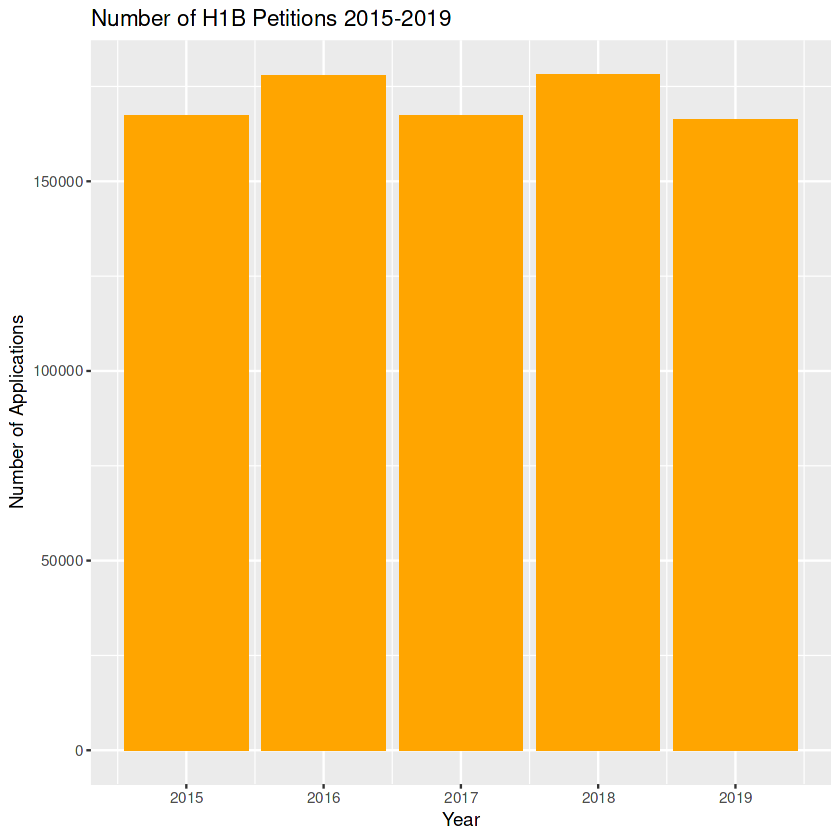

In [4]:
# Bar chart for employer distribution
employer_distribution <- data %>%
  group_by(YEAR) %>%
  summarise(count = n()) %>%
  top_n(10, count)


# Plot bar chart
ggplot(employer_distribution, aes(x = YEAR, y = count)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Number of H1B Petitions 2015-2019", x = "Year", y = "Number of Applications") 

No any definite patterns just number of applicants each year. 

## Pie Chart for the Distribution of Job Titles

Visualize the distribution of `CASE_STATUS` using a pie chart. We can create a pie chart of job titles (or another relevant categorical variable) with the following code:

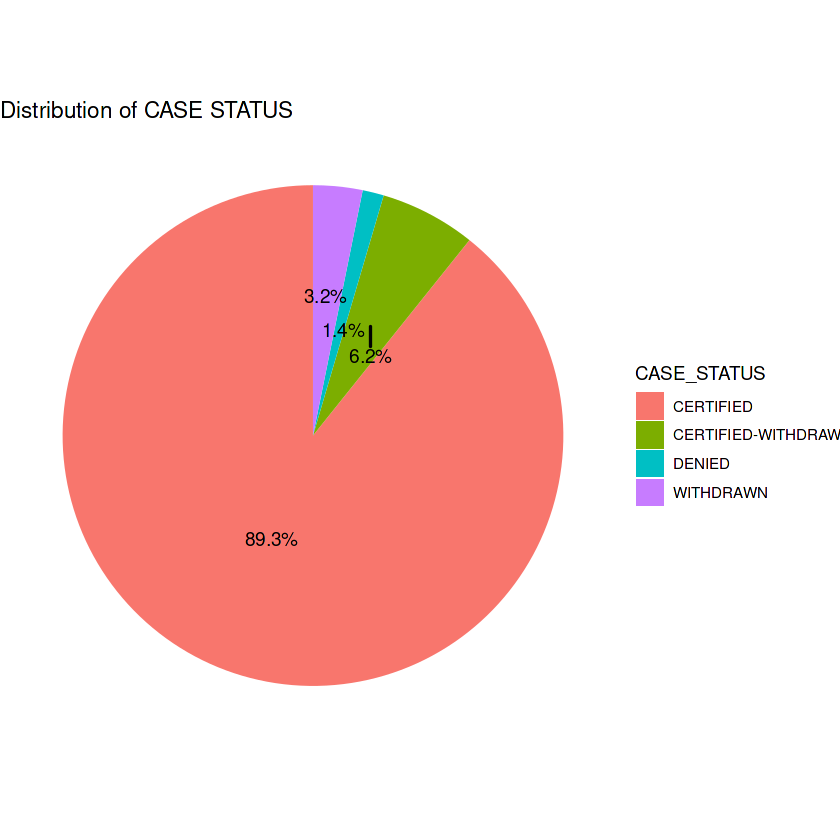

In [5]:
# Pie chart for CASE_STATUS with corrected label positioning
job_title_distribution <- data %>%
  group_by(CASE_STATUS) %>%
  summarise(count = n()) %>%
  mutate(percentage = round(count / sum(count) * 100, 1))

# Plot pie chart with labels using geom_text_repel
ggplot(job_title_distribution, aes(x = "", y = count, fill = CASE_STATUS)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_void() +
  labs(title = "Distribution of CASE STATUS") +
  
  # Add percentage labels using geom_text_repel
  geom_text_repel(aes(label = paste0(percentage, "%"), y = count), 
                  position = position_stack(vjust = 0.5), 
                  direction = "y", 
                  show.legend = FALSE, 
                  segment.color = "black",  # Add connecting lines
                  segment.size = 0.7) +
  theme(legend.position = "right")


It appears that the percentage of cases denied is really low. Upon further research, the denied percentage is not indicative of all the applications denied in the H-1B application process.


## Bar Chart for Employer Distribution

For understanding which employers have filed the most H1B petitions, we can use a bar chart:

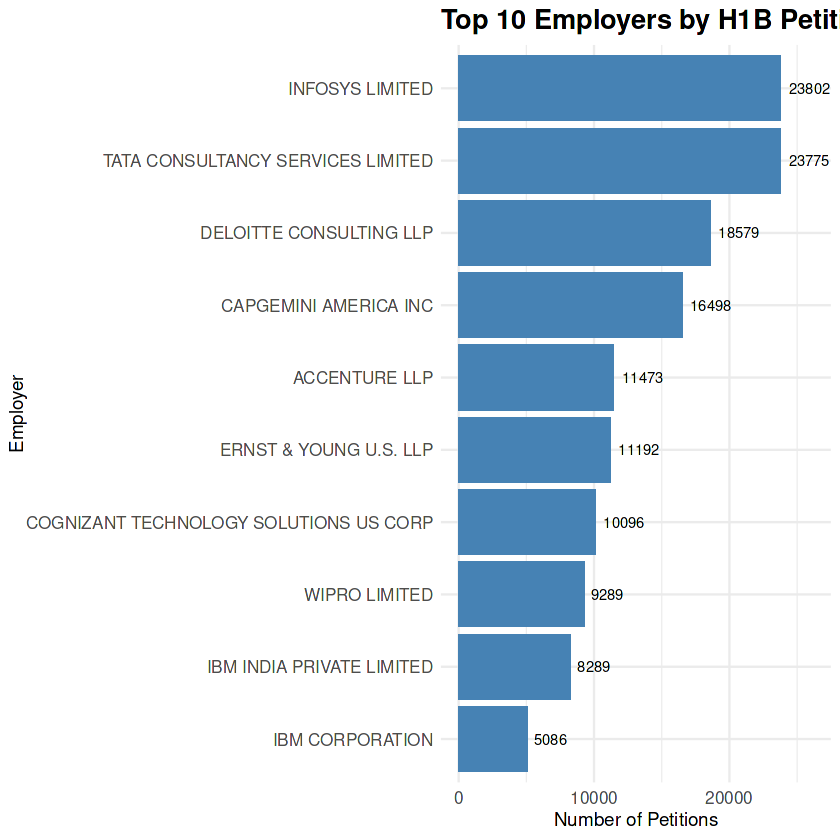

In [6]:
# Step 1: Identify the top 10 companies with the most H1B applications
top_employers <- data %>%
  group_by(EMPLOYER_NAME) %>%
  summarise(application_count = n()) %>%
  arrange(desc(application_count)) %>%
  top_n(10, wt = application_count)

# Step 2: Create a bar chart for the top 10 employers
ggplot(top_employers, aes(x = reorder(EMPLOYER_NAME, application_count), y = application_count)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Customize bar color
  coord_flip() +
  geom_text(aes(label = application_count), hjust = -0.2, size = 3) +  # Add data labels
  labs(
    title = "Top 10 Employers by H1B Petitions",
    x = "Employer",
    y = "Number of Petitions"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10)
  ) +
  ylim(0, max(top_employers$application_count) * 1.1)  # Extend y-axis slightly

## Heatmap of U.S. H1B visa applicants


In [7]:
# Group by state abbreviations instead of full names
state_data <- data %>%
  group_by(WORKSITE_STATE_ABB) %>%
  summarise(applicant_count = n())

# Check the summarized data
head(state_data)

WORKSITE_STATE_ABB,applicant_count
<chr>,<int>
IL,134344
ILLINOIS,28754
IN,26090
INDIANA,6700
MI,82789
MICHIGAN,18128


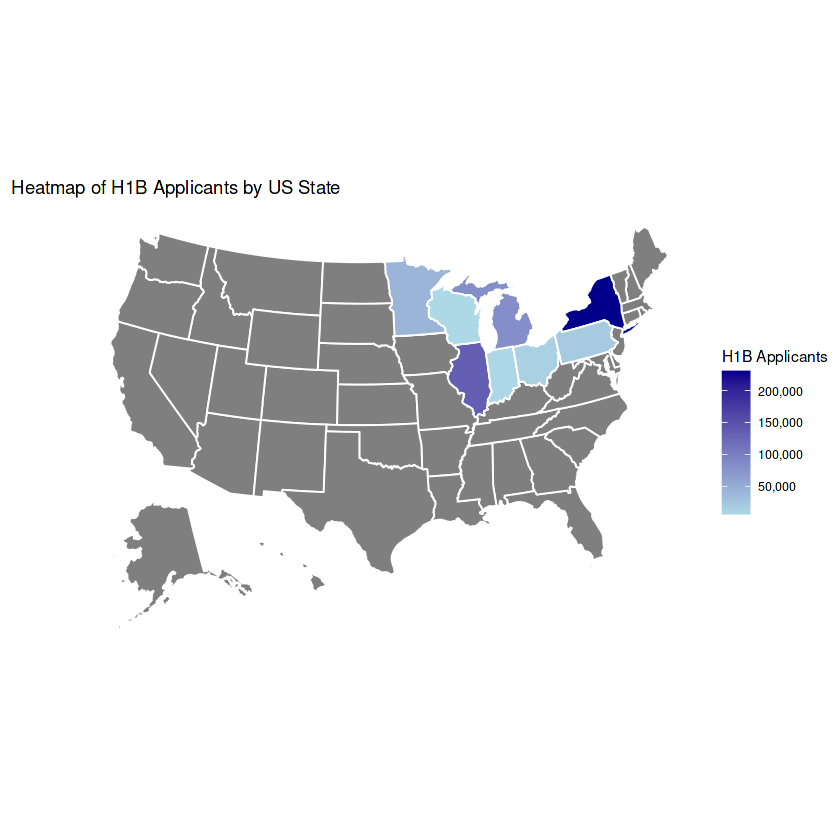

In [8]:
# Rename the column to 'state' as expected by usmap
state_data <- state_data %>%
  rename(state = WORKSITE_STATE_ABB)

# Create a heatmap plot using the applicant count data
plot_usmap(data = state_data, values = "applicant_count", color = "white") +
  scale_fill_continuous(low = "lightblue", high = "darkblue", name = "H1B Applicants", label = scales::comma) +
  labs(title = "Heatmap of H1B Applicants by US State") +
  theme(legend.position = "right")

This map highlights the location of applicants. From the figure, we can see that the majority of the H-1B visa applicants are applying from New York stands followed by **Illinois** and **Pennsylvania**. The heatmap highlights that northeastern and midwestern states, especially New York, are major hubs for H1B applicants, likely due to the presence of **large metropolitan areas**, **tech hubs**, or industries that require skilled foreign labor. States with fewer metropolitan centers or industries dependent on H1B workers show much lower applicant concentrations.

## Need to visualize percentage denial over the years

In [9]:
# Calculate the percentage of denied applications per year
denial_data <- data %>%
  group_by(YEAR) %>%
  summarise(
    total_applications = n(),
    denied_applications = sum(CASE_STATUS == "DENIED")
  ) %>%
  mutate(denial_percentage = (denied_applications / total_applications) * 100)

# View the data
head(denial_data)

YEAR,total_applications,denied_applications,denial_percentage
<int>,<int>,<int>,<dbl>
2015,167394,2904,1.7348292
2016,177931,2632,1.4792251
2017,167350,2329,1.3916941
2018,178268,2362,1.3249714
2019,166273,1544,0.9285933


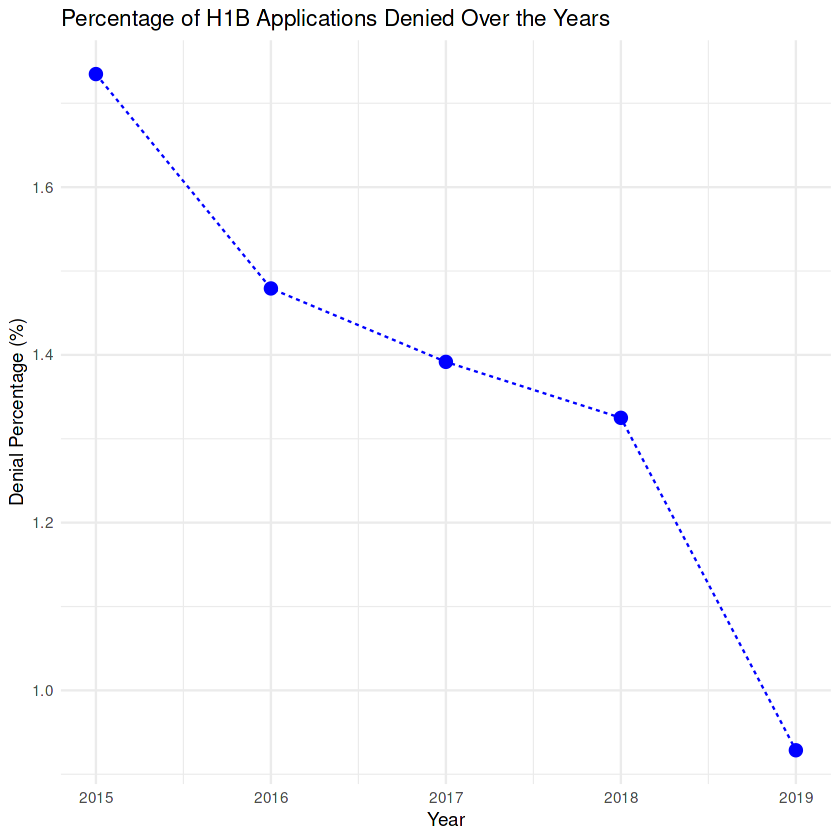

In [10]:
# Create a scatter plot for denial percentage over the years
ggplot(denial_data, aes(x = YEAR, y = denial_percentage)) +
  geom_point(color = "blue", size = 3) +
  geom_line(color = "blue", linetype = "dashed") +
  labs(
    title = "Percentage of H1B Applications Denied Over the Years",
    x = "Year",
    y = "Denial Percentage (%)"
  ) +
  theme_minimal()

The scatter plot shows the percentage of H1B applications denied over the years from 2015 to 2019. Here are the key insights:

1.  **Declining Denial Rate**: There is a steady decline in the denial percentage from 2015 to 2019. In 2015, the denial rate was around 1.7%, while in 2019, it decreased to about 1.0%.

2.  **Year-to-Year Trend**: Each year sees a slight decrease in the denial rate, with the sharpest decline occurring between 2018 and 2019. This suggests an improvement in the approval rate of H1B applications over these years.

3.  **Overall Trend**: The overall trend indicates that fewer H1B applications were denied as time progressed, possibly reflecting changes in immigration policies, application quality, or other factors impacting the H1B visa process.

In summary, the plot reveals a positive trend for H1B applicants, with denial rates dropping consistently across these years.

## Trend of number of denied applications per state and per year

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


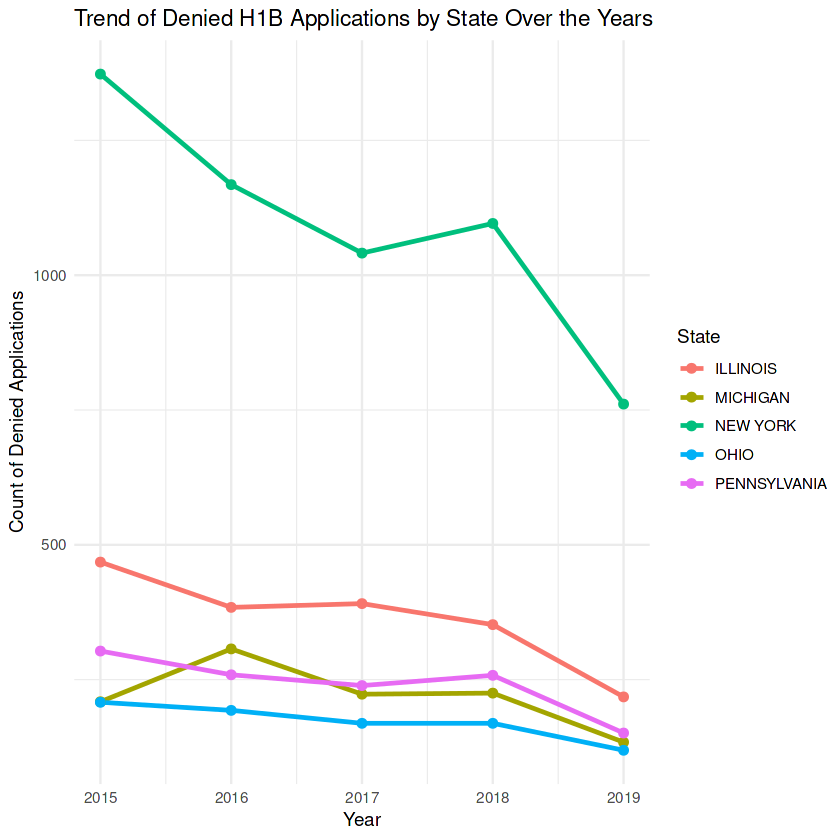

In [11]:
# Filter and group data to count the number of denied applications per state and year
denied_by_state_trend <- data %>%
  filter(CASE_STATUS == "DENIED") %>%
  group_by(YEAR, WORKSITE_STATE_FULL) %>%
  summarise(denied_count = n()) %>%
  ungroup()

# Get the top 5 states with the most denied applications
top_states <- denied_by_state_trend %>%
  group_by(WORKSITE_STATE_FULL) %>%
  summarise(total_denied = sum(denied_count)) %>%
  top_n(5, total_denied) %>%
  pull(WORKSITE_STATE_FULL)

# Filter the trend data for only the top 5 states
denied_by_state_top_trend <- denied_by_state_trend %>%
  filter(WORKSITE_STATE_FULL %in% top_states)

# Create a line plot to show trends of denied applications by state over the years
ggplot(denied_by_state_top_trend, aes(x = YEAR, y = denied_count, color = WORKSITE_STATE_FULL, group = WORKSITE_STATE_FULL)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Trend of Denied H1B Applications by State Over the Years",
    x = "Year",
    y = "Count of Denied Applications",
    color = "State"
  ) +
  theme_minimal()

## Percentage of H1-B accepted each year Bar Chart

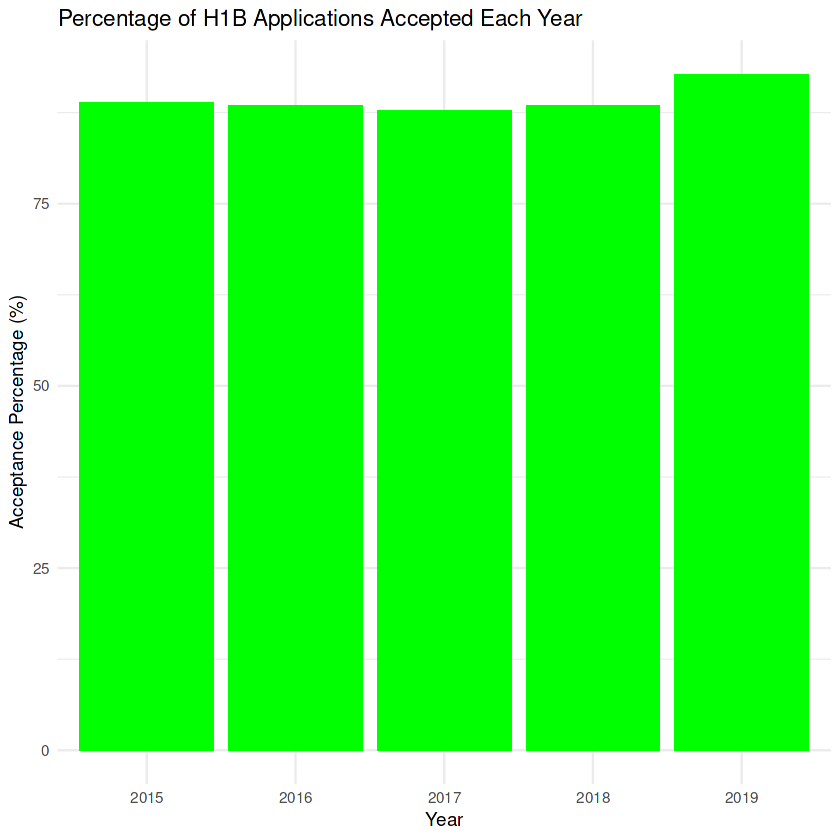

In [12]:
# Calculate the percentage of accepted applications per year
acceptance_data <- data %>%
  group_by(YEAR) %>%
  summarise(
    total_applications = n(),
    accepted_applications = sum(CASE_STATUS == "CERTIFIED")
  ) %>%
  mutate(acceptance_percentage = (accepted_applications / total_applications) * 100)

# View the data
#head(acceptance_data)

# Create a bar chart for acceptance percentage over the years
ggplot(acceptance_data, aes(x = factor(YEAR), y = acceptance_percentage)) +
  geom_bar(stat = "identity", fill = "green") +
  labs(
    title = "Percentage of H1B Applications Accepted Each Year",
    x = "Year",
    y = "Acceptance Percentage (%)"
  ) +
  theme_minimal()

## The 10 most common job Titles

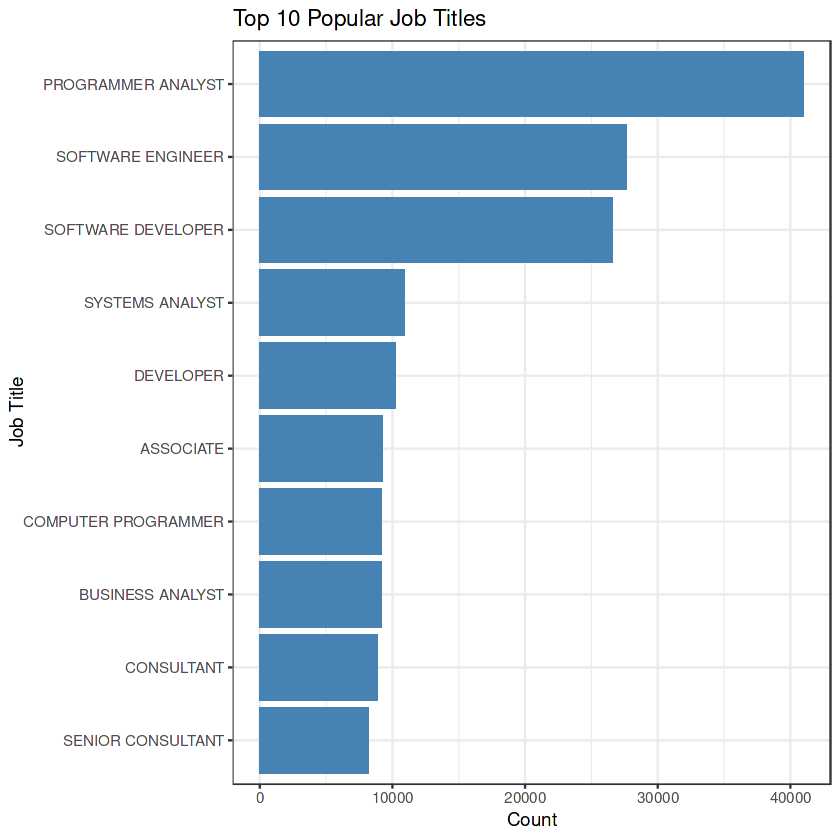

In [13]:
# Bar chart for employer distribution
job_title_distribution <- data %>%
  group_by(JOB_TITLE) %>%
  summarise(count = n()) %>%
  top_n(10, count)


# Plot bar chart
ggplot(job_title_distribution, aes(x = reorder(JOB_TITLE, count), y = count)) +
  geom_bar(stat = "identity", fill="steelblue") +
  coord_flip() +
  theme_bw()+
  labs(title = "Top 10 Popular Job Titles", x = "Job Title", y = "Count")
        

Seems like `Programmer Analyst` is more popular `job title`.

##  Number of unique Job Titles

In [14]:
# Find the total number of unique job titles
total_unique_job_titles <- length(unique(data$JOB_TITLE))

# Display the result
total_unique_job_titles

[1] 111355

Oh! Lot of job titles.

## Trends for job titles over years:

In [15]:
# Get the top 10 most common job titles to focus on for trend analysis
top_job_titles <- data %>%
  group_by(JOB_TITLE) %>%
  summarise(count = n()) %>%
  top_n(10, count) %>%
  pull(JOB_TITLE)

# Filter the original dataset to include only the top job titles
trend_data <- data %>%
  filter(JOB_TITLE %in% top_job_titles) %>%
  group_by(YEAR, JOB_TITLE) %>%
  summarise(count = n()) %>%
  ungroup()

# View the prepared data
head(trend_data)

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


YEAR,JOB_TITLE,count
<int>,<chr>,<int>
2015,ASSOCIATE,1530
2015,BUSINESS ANALYST,2343
2015,COMPUTER PROGRAMMER,4070
2015,CONSULTANT,1911
2015,DEVELOPER,1892
2015,PROGRAMMER ANALYST,13991


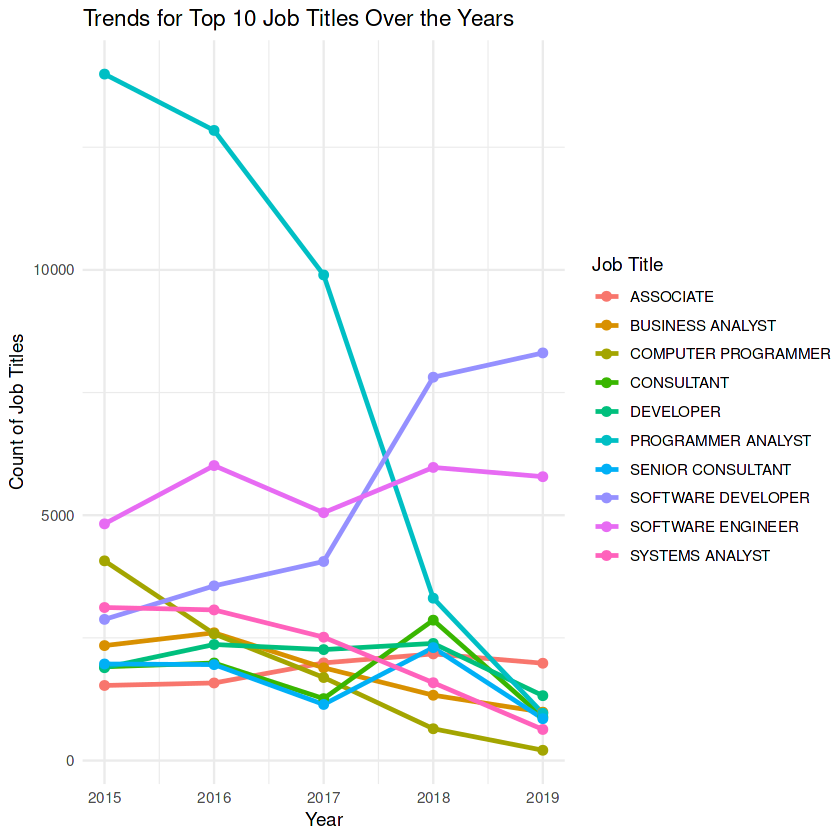

In [16]:
# Create a line plot to show trends for job titles over the years
ggplot(trend_data, aes(x = YEAR, y = count, color = JOB_TITLE, group = JOB_TITLE)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Trends for Top 10 Job Titles Over the Years",
    x = "Year",
    y = "Count of Job Titles",
    color = "Job Title"
  ) +
  theme_minimal()

**Despite fluctuations in demand for various job titles, wages for tech-related roles have remained stable, with Data Scientists and Software Developers consistently commanding similar median wages.**

**I am `Data Scientist` Enthusiast and I want to see about this Job Title:**

## Trend for `Software Developer`, `DATA SCIENTIST` and others `Job Titles`:

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


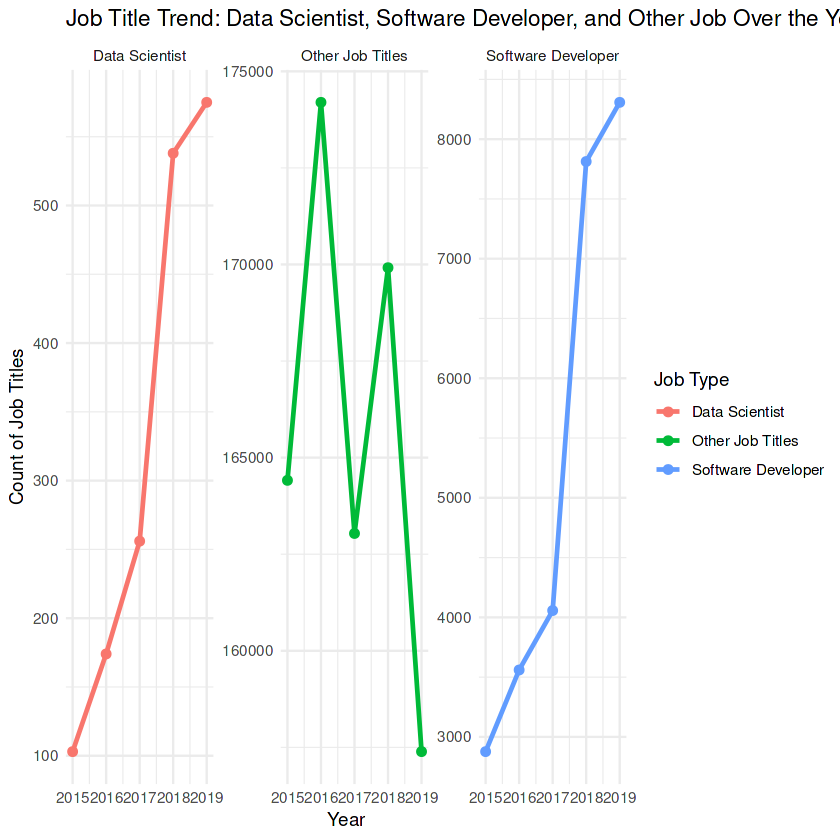

In [17]:
job_count_trend_data <- data %>%
  filter(!is.na(JOB_TITLE)) %>%  # Exclude rows with NA in job title
  mutate(Job_Type = case_when(
    JOB_TITLE == "DATA SCIENTIST" ~ "Data Scientist",
    JOB_TITLE == "SOFTWARE DEVELOPER" ~ "Software Developer",
    TRUE ~ "Other Job Titles"  # All other job titles fall into this category
  )) %>%
  group_by(YEAR, Job_Type) %>%
  summarise(count = n()) %>%
  ungroup()

# Facet plot for each job type to better visualize the trends for smaller counts
ggplot(job_count_trend_data, aes(x = YEAR, y = count, color = Job_Type, group = Job_Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Job Title Trend: Data Scientist, Software Developer, and Other Job Over the Years",
    x = "Year",
    y = "Count of Job Titles",
    color = "Job Type"
  ) +
  facet_wrap(~ Job_Type, scales = "free_y") +  # Facet by job type with free y-axis scale
  theme_minimal()

## Trend of the wage of Job Title `Software Developer` versus other job title

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


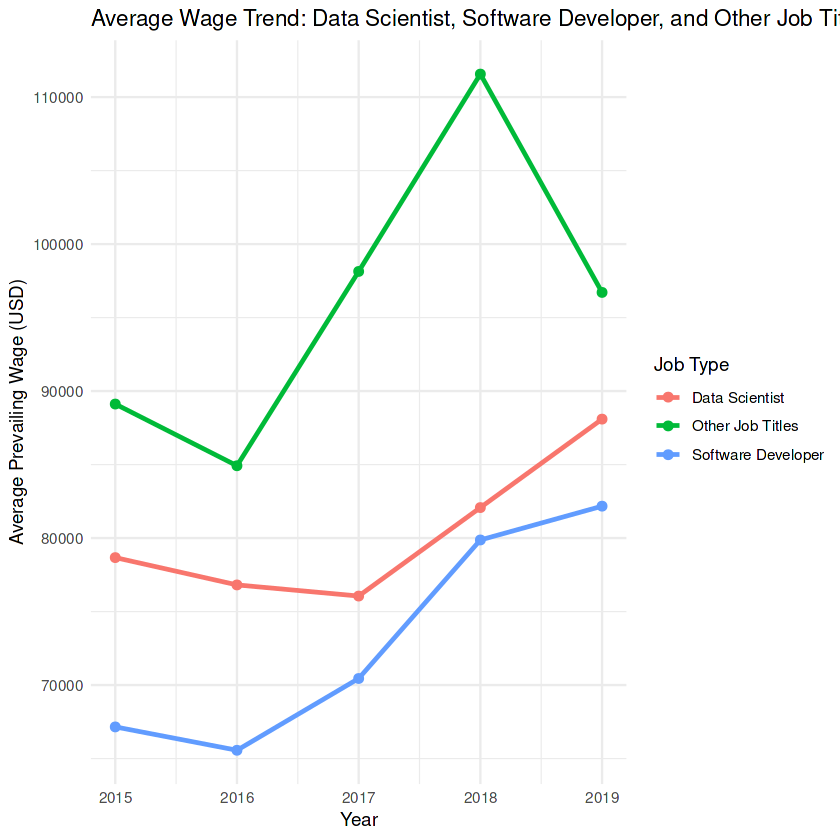

In [18]:
# Create a new column to categorize job titles as "Data Scientist," "Software Developer," or "Other Job Titles"
job_trend_data <- data %>%
  filter(!is.na(PREVAILING_WAGE) & !is.na(JOB_TITLE)) %>%  # Exclude rows with NA in both wage and job title columns
  mutate(Job_Type = case_when(
    JOB_TITLE == "DATA SCIENTIST" ~ "Data Scientist",
    JOB_TITLE == "SOFTWARE DEVELOPER" ~ "Software Developer",
    TRUE ~ "Other Job Titles"  # Any other job title falls into this category
  )) %>%
  group_by(YEAR, Job_Type) %>%
  summarise(average_wage = mean(PREVAILING_WAGE)) %>%
  ungroup()

# View the prepared data
# head(job_trend_data)

# Create a line plot to show wage trends for Data Scientist, Software Developer, and Other Job Titles
ggplot(job_trend_data, aes(x = YEAR, y = average_wage, color = Job_Type, group = Job_Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Average Wage Trend: Data Scientist, Software Developer, and Other Job Titles",
    x = "Year",
    y = "Average Prevailing Wage (USD)",
    color = "Job Type"
  ) +
  theme_minimal()

### Box Plot:

Warning message:
“Removed 274 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


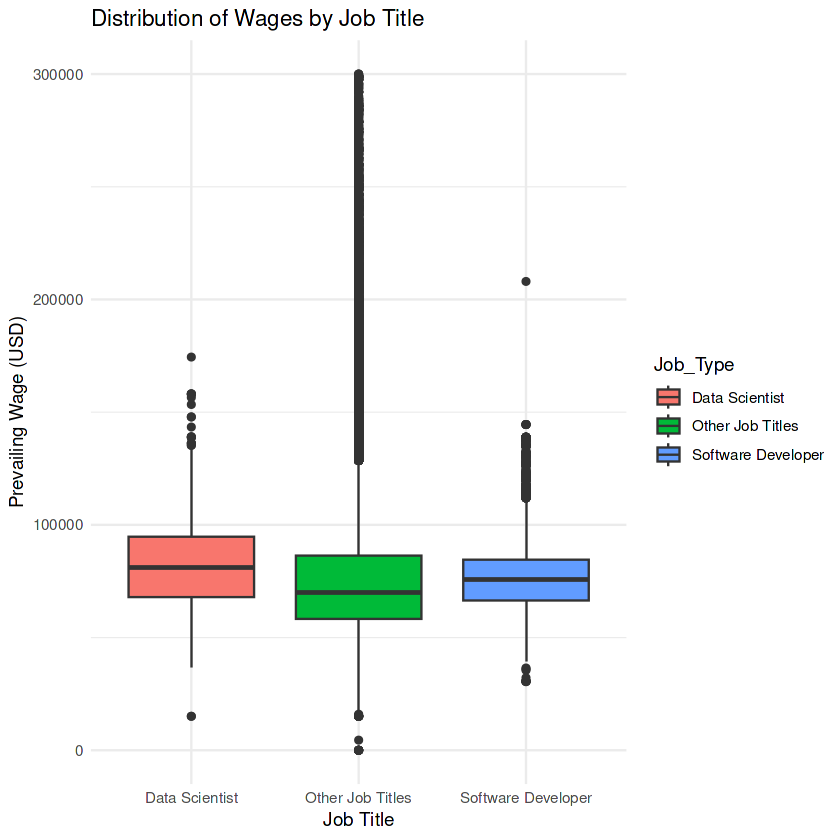

In [19]:
# Create a new column to categorize job titles as "Data Scientist," "Software Developer," or "Other Job Titles"
job_trend_data <- data %>%
  filter(!is.na(PREVAILING_WAGE) & !is.na(JOB_TITLE)) %>%  # Exclude rows with NA in both wage and job title columns
  mutate(Job_Type = case_when(
    JOB_TITLE == "DATA SCIENTIST" ~ "Data Scientist",
    JOB_TITLE == "SOFTWARE DEVELOPER" ~ "Software Developer",
    TRUE ~ "Other Job Titles"  # Any other job title falls into this category
  ))  # No summarization needed here since we want individual wage data


# Box plot with y-axis limit to exclude extreme outliers
ggplot(job_trend_data, aes(x = Job_Type, y = PREVAILING_WAGE, fill = Job_Type)) +
  geom_boxplot() +
  labs(
    title = "Distribution of Wages by Job Title",
    x = "Job Title",
    y = "Prevailing Wage (USD)"
  ) +
  ylim(0, 300000) +  # Limit the y-axis to wages below $300,000
  theme_minimal()

**Observation:** 

The box plot shows that **Data Scientists** and **Software Developers** have similar and consistent median wages around **\$100,000**, with relatively narrow wage ranges. **Other Job Titles** have more wage variation, including higher outliers, suggesting a broader spread of roles with different wage levels. While the typical wage for all groups centers around **\$100,000**, some roles in the "Other Job Titles" category pay significantly more.

### Violin Plot - Comparing Distributions

Warning message:
“Removed 274 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_violin()`).”


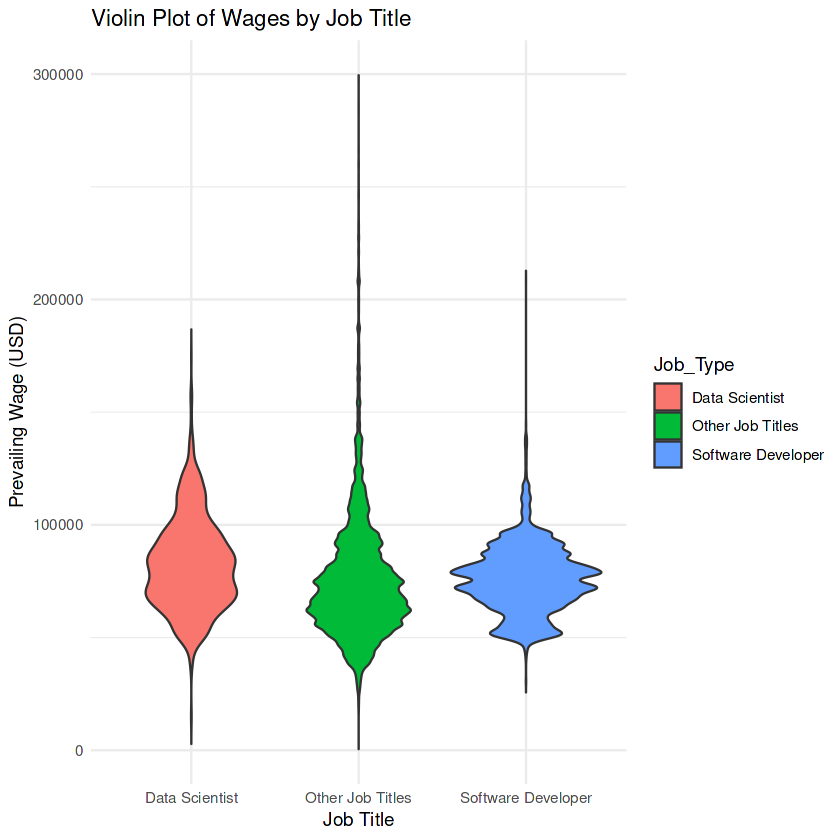

In [20]:
# Violin plot to compare wage distribution by job type
ggplot(job_trend_data, aes(x = Job_Type, y = PREVAILING_WAGE, fill = Job_Type)) +
  geom_violin(trim = FALSE) +
  labs(
    title = "Violin Plot of Wages by Job Title",
    x = "Job Title",
    y = "Prevailing Wage (USD)"
  ) +
  ylim(0, 300000) +
  theme_minimal()

**Observation:**

The **violin plot** shows the distribution of wages for **Data Scientist**, **Software Developer**, and **Other Job Titles**:

-   **Data Scientist** and **Software Developer** wages are concentrated around **\$100,000**, with both having symmetrical, tighter distributions.
-   **Other Job Titles** have a wider range, with more variation and several outliers extending beyond **\$200,000**.
-   The shapes of the violins suggest that **Data Scientist** and **Software Developer** roles have more consistent wages, while **Other Job Titles** show more diversity in wage distribution.

### Wages for H1B Cases in Top 10 Companies

Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


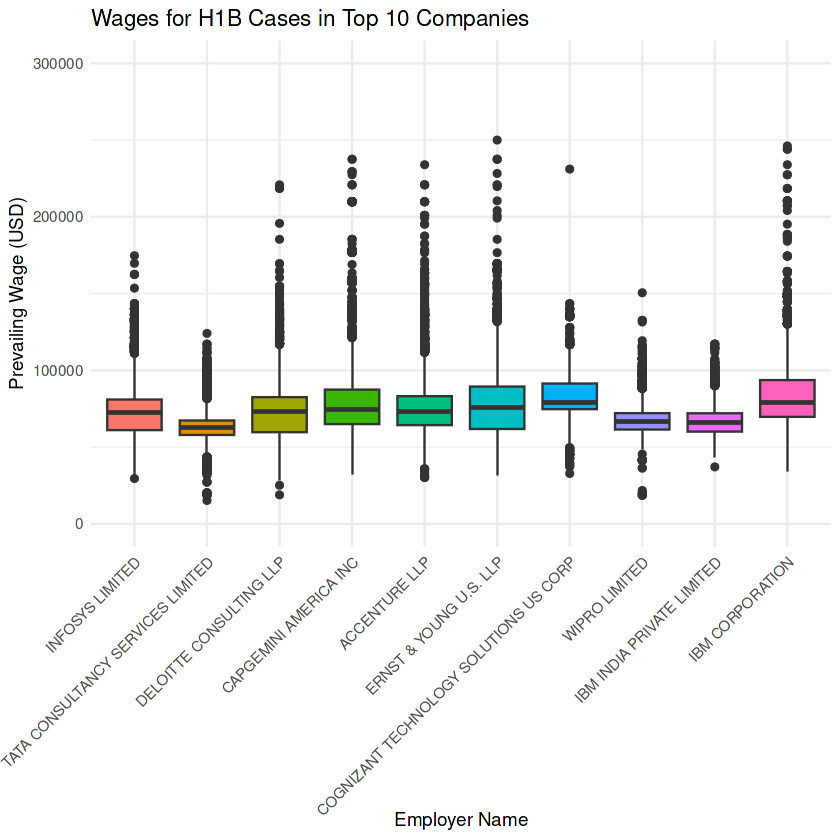

In [21]:
# Step 1: Identify the top 10 companies with the most H1B applications
top_companies <- data %>%
  group_by(EMPLOYER_NAME) %>%
  summarise(application_count = n()) %>%
  arrange(desc(application_count)) %>%
  top_n(10, wt = application_count)

# Step 2: Filter the data for only the top 10 companies
top_companies_data <- data %>%
  filter(EMPLOYER_NAME %in% top_companies$EMPLOYER_NAME)

# Step 3: Reorder EMPLOYER_NAME factor levels based on the order of top_companies
top_companies_data$EMPLOYER_NAME <- factor(top_companies_data$EMPLOYER_NAME, 
                                           levels = top_companies$EMPLOYER_NAME)

# Step 4: Create a box plot for the wages of these top 10 companies
ggplot(top_companies_data, aes(x = EMPLOYER_NAME, y = PREVAILING_WAGE, fill = EMPLOYER_NAME)) +
  geom_boxplot() +
  labs(
    title = "Wages for H1B Cases in Top 10 Companies",
    x = "Employer Name",
    y = "Prevailing Wage (USD)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for readability
    legend.position = "none"  # Remove legend as it may be redundant with x-axis labels
  ) +
  ylim(0, 300000)  # Limit y-axis to $300,000 to exclude extreme outliers

**Observation:**
* Top 10 companies average salary lies around $100k with some outliers. 

## Story: Insights from the H1B Visa Data (2015-2019)

### **Introduction**:

The H1B visa dataset from 2015 to 2019 provides detailed information on H1B petitions, including case status, job titles, wages, worksites, and more. We explored various job titles like **Data Scientist**, **Software Developer**, and **Other Job Titles**, and analyzed trends in wages, denial rates, and applications by region. Using visualizations such as pie charts, box plots, violin plots, density plots, and scatter plots, we uncovered patterns in the distribution of wages and job title trends over time.

### **Observations**:

1.  **Pie Chart**:
    -   **Observation**: The pie chart displayed the distribution of **case statuses** in the dataset. The majority of applications were either **Certified** or **Certified-Withdrawn**, while a small percentage were **Denied**.
    -   **Conclusion**: The relatively small proportion of **denied** applications highlights that most H1B petitions go through successfully, either being **certified** or **withdrawn** by applicants or employers after certification.
2.  **Box Plot**:
    -   **Observation**: The box plot comparing the wages of **Data Scientist**, **Software Developer**, and **Other Job Titles** revealed that both **Data Scientists** and **Software Developers** have median wages around **\$100,000**, while **Other Job Titles** showed a wider range of wages, including several high-wage outliers.
    -   **Conclusion**: Wages for **Data Scientists** and **Software Developers** are more predictable and consistent, while **Other Job Titles** include a more diverse set of roles, some with significantly higher wages.
3.  **Violin Plot**:
    -   **Observation**: The violin plot displayed the wage distributions for each job type. **Data Scientists** and **Software Developers** showed concentrated distributions around **\$100,000**, while **Other Job Titles** showed a broader spread, indicating higher wage variability.
    -   **Conclusion**: The wider distribution in the **Other Job Titles** category suggests that it includes roles with a greater range of experience levels and responsibilities, leading to more wage variation.
4.  **Density Plot**:
    -   **Observation**: Initially, the density plot was distorted by extreme outliers, making it difficult to observe patterns. After limiting the x-axis to exclude extreme wages (greater than **\$300,000**), the plot showed that most wages for all job types cluster around **\$100,000**.
    -   **Conclusion**: Most H1B applicants earn between **\$60,000** and **\$150,000**, with only a small number earning exceptionally high wages, especially within the **Other Job Titles** category.
5.  **Heatmap of H1B Applicants by State**:
    -   **Observation**: The heatmap indicated that **New York**, **Illinois**, and **Pennsylvania** were the states with the highest concentration of H1B applicants. These regions likely house large metropolitan areas and industries dependent on foreign talent.
    -   **Conclusion**: Northeastern and Midwestern states, especially those with tech hubs, are major centers for H1B applications.
6.  **Scatter Plot of Denial Rates Over the Years**:
    -   **Observation**: The scatter plot of H1B denial rates showed a downward trend from **2015 to 2019**, with denial rates decreasing from **1.7%** to **0.9%**.
    -   **Conclusion**: This downward trend suggests either improved application processes or policy changes that made it easier for H1B petitions to be certified over the years.
7.  **Job Title Trends Over the Years**:
    -   **Observation**: The line plot comparing **Data Scientist**, **Software Developer**, and **Other Job Titles** over the years revealed that **Software Developer** consistently had the highest number of H1B applications. **Data Scientist** applications have steadily increased, but they remain lower compared to **Software Developer**.
    -   **Conclusion**: **Software Developer** is the dominant job title in terms of H1B applications, likely reflecting the ongoing need for tech talent in U.S. industries. **Data Scientist** is growing but remains a niche compared to **Software Developer**.
8.  **Median Wage Trends for Data Scientist, Software Developer, and Other Job Titles**:
    -   **Observation**: The median wage trend plot showed that wages for all three job categories have remained fairly consistent over the years, with **Data Scientist** and **Software Developer** wages hovering around **\$100,000**.
    -   **Conclusion**: Despite fluctuations in demand for various job titles, wages for tech-related roles have remained stable, with **Data Scientists** and **Software Developers** consistently commanding similar median wages.

### **Summary**:

Through analysis of the H1B dataset, several key patterns emerged. The **majority of petitions are certified**, and denial rates have been declining, indicating a favorable environment for H1B applicants. **Software Developers** continue to dominate the H1B landscape, with a high number of applications and stable wages. **Data Scientists** have emerged as a growing job category, with similar wage structures. In contrast, **Other Job Titles** include a broader range of roles, leading to more wage variability. The visualizations, including pie charts, box plots, violin plots, and density plots, helped uncover these important insights about wage distributions and job trends.


![image](https://github.com/user-attachments/assets/02a7585e-29d2-4827-91a1-70a04c42f53f)

**Hope this helps you to sharp your skills in R. Don't forget to 👍!**